In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#read data
contributions = pd.read_csv("contributions.csv")

In [41]:
#get average donation size via groupby
avg_contributions = contributions.groupby(["Candidate"]).mean()
avg_contributions.reset_index(inplace=True)
avg_contributions=avg_contributions.rename(columns={'Transaction amt':'Average donation'})
avg_contributions.head()

,Candidate,Partisan Lean,Primary %,Transaction date (MMDDYYYY),Average donation
0,"ALLEN, KATHLEEN",-12.73,11.02,9132017.0,1000.000000
1,"ALLMAN, MICHAEL",NaN,9.57,3092018.0,2000.000000
2,"ALLRED, COLIN",-4.98,38.43,6127351.2,1657.333333
3,"ANDREI, LINDA",-13.93,15.33,3202018.0,1000.000000
4,"ARMSTRONG, KELLY",NaN,56.22,6460455.5,2920.312500


In [45]:
#divide into dem/rep using partisan lean, >0 being dems, <0 being reps
dem_averages = avg_contributions[avg_contributions['Partisan Lean']>0]
rep_averages = avg_contributions[avg_contributions['Partisan Lean']<0]

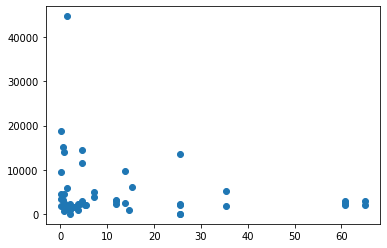

In [56]:
#Democrats
fig, ax = plt.subplots()

x=dem_averages['Partisan Lean']
y=dem_averages['Average donation']
plt.scatter(x, y)

#EDA label points for top raising candidates
top_dems = ['ALLEN, KATHLEEN', 'SCHUMER, CHARLES', 'HASSAN, MARGARET WOOD']

n = dem_averages['Candidate']
for i, txt in enumerate(n):
    if txt in top_dems:
        ax.annotate(txt, (x[i], y[i]))